<a href="https://colab.research.google.com/github/m-atique/deeplearning-assignment/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import glob
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,utils

In [57]:
images =[]
labels=[]
types = []

my_path = "/content/drive/MyDrive/ml data/flowers/"
catg = glob.glob(my_path+'/*',recursive = True)
for dir in catg:
  types.append(dir.split(sep='/')[-1])
print(types)
files = glob.glob(my_path + '/**/*.jpg', recursive=True)
for i in files:
  labels.append(i.split(sep='/')[-2])
  img=Image.open(i)
  img =img.convert('L')   # Convert image to gray scale
  img =img.resize((100,100))
  img_ar = np.array(img)
  images.append(img_ar)
  

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


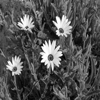

In [61]:
a= images[20]
b = Image.fromarray(a)
b  # gray scale image of 100 x 100

In [65]:
img_data = np.asarray(images)


(4323, 100, 100)

In [67]:
labels= np.asarray(labels)

In [68]:
labels.shape

(4323,)

In [69]:
train_data = img_data[:2594]
train_labels = labels[:2594]
#--------------------------------------
test_data =img_data[2594:]
test_labels= labels[2594:]

In [85]:
from sklearn.preprocessing import LabelEncoder

def prepare_targets(y_train):
    le = LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
   
    return y_train

In [86]:
train_labels2 = prepare_targets(train_labels)

In [91]:
train_labels2

array([0, 0, 0, ..., 2, 2, 2])

In [87]:
test_labels2 = prepare_targets(test_labels)

In [93]:
train_data2 = train_data/255.0
test_data2 = test_data/255.0

In [107]:
modal = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

In [108]:
modal.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
modal.fit(train_data2,train_labels2,epochs=140,batch_size=128)

Epoch 1/140
21/21 [==============================] - 2s 68ms/step - loss: 4.0412 - accuracy: 0.2939
Epoch 2/140
21/21 [==============================] - 1s 67ms/step - loss: 1.4455 - accuracy: 0.3910
Epoch 3/140
21/21 [==============================] - 1s 67ms/step - loss: 1.1750 - accuracy: 0.4399
Epoch 4/140
21/21 [==============================] - 1s 67ms/step - loss: 1.0486 - accuracy: 0.4504
Epoch 5/140
21/21 [==============================] - 1s 69ms/step - loss: 1.0633 - accuracy: 0.4520
Epoch 6/140
21/21 [==============================] - 1s 67ms/step - loss: 1.0872 - accuracy: 0.4475
Epoch 7/140
21/21 [==============================] - 1s 67ms/step - loss: 1.1094 - accuracy: 0.4338
Epoch 8/140
21/21 [==============================] - 1s 68ms/step - loss: 1.0150 - accuracy: 0.4768
Epoch 9/140
21/21 [==============================] - 1s 66ms/step - loss: 1.0260 - accuracy: 0.4930
Epoch 10/140
21/21 [==============================] - 1s 66ms/step - loss: 1.1498 - accuracy: 0.4312

In [115]:
modal.predict(test_data2)


array([[9.90196943e-01, 8.05632304e-03, 1.74682401e-03, ...,
        8.11186405e-13, 8.54014023e-15, 5.35819761e-14],
       [2.58702738e-03, 2.02852068e-03, 9.95378733e-01, ...,
        2.94259991e-07, 2.51087595e-09, 2.30976021e-08],
       [9.21585619e-01, 4.55795899e-02, 3.28347124e-02, ...,
        3.76627707e-09, 7.00822456e-11, 4.45077697e-10],
       ...,
       [1.14382796e-01, 8.78024936e-01, 7.59223290e-03, ...,
        4.57713811e-10, 1.33377927e-11, 9.28923535e-11],
       [4.36523050e-01, 5.14515281e-01, 4.89610322e-02, ...,
        8.60160227e-08, 6.01253847e-09, 3.13771586e-08],
       [9.71289631e-03, 6.87358379e-01, 3.02928716e-01, ...,
        3.80419385e-09, 4.84513853e-11, 3.90164706e-10]], dtype=float32)

In [118]:
modal.evaluate(test_data2,test_labels2)

55/55 [==============================] - 1s 12ms/step - loss: 4.0954 - accuracy: 0.2152


[4.095402717590332, 0.2151532620191574]